In [62]:
import numpy as np
import matplotlib.pyplot as plt

## Armor damage reduction

Illustration of armor performance at 50 damage. The initial damage value is passed through a decreasing exponential function to determine the final damage value.

In [63]:
damage = 50
armor = 100
k = .0217 # Decay rate

> **Parameter k** : *The decay rate. The greater the k, the faster the decay. We could say that k represents the “speed” at which the function decreases.* 
> 
> *The balance can be delicate because too high, a k value could make the armor far too powerful at its initial values. Conversely, too low, a k value would make armor points too volatile. In our configuration, a k value between 0.02 and 0.035 seems to give balanced armor performance.*

In [64]:
x = np.linspace(0, armor, armor)
y = damage * np.exp(-k * x)

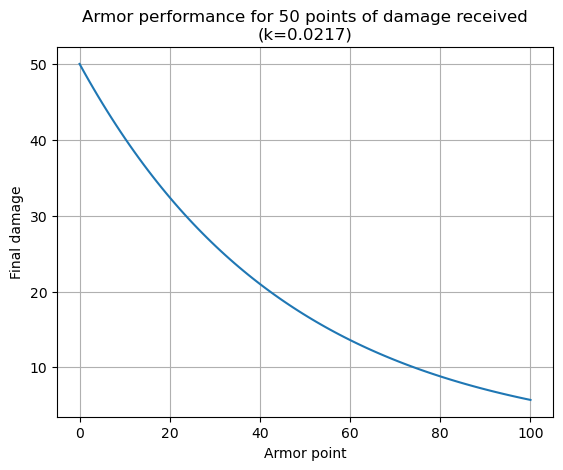

In [65]:
plt.plot(x, y)
plt.xlabel("Armor point")
plt.ylabel("Final damage")
plt.title(f"Armor performance for 50 points of damage received\n(k={k})")
plt.grid(True)
plt.show()

## Armor decay

In [66]:
k = .04
x = np.linspace(0, armor, armor)
y = damage * np.exp(-k * x)

In [67]:
y

array([50.        , 48.02006599, 46.11853475, 44.29230165, 42.53838496,
       40.85392106, 39.2361597 , 37.68245956, 36.1902839 , 34.75719642,
       33.38085731, 32.05901942, 30.78952456, 29.57030003, 28.39935517,
       27.27477819, 26.19473297, 25.15745612, 24.16125406, 23.20450029,
       22.2856327 , 21.40315106, 20.55561453, 19.74163932, 18.95989646,
       18.20910958, 17.48805287, 16.79554906, 16.13046749, 15.49172226,
       14.87827051, 14.28911063, 13.72328071, 13.17985691, 12.65795197,
       12.15671378, 11.67532395, 11.21299654, 10.76897667, 10.34253941,
        9.9329885 ,  9.53965526,  9.16189751,  8.79909846,  8.45066577,
        8.11603056,  7.79464646,  7.48598875,  7.18955347,  6.90485665,
        6.63143344,  6.36883742,  6.11663987,  5.874429  ,  5.64180937,
        5.41840116,  5.20383963,  4.99777445,  4.79986917,  4.60980069,
        4.42725867,  4.25194507,  4.08357365,  3.92186953,  3.76656867,
        3.61741752,  3.47417256,  3.33659991,  3.20447496,  3.07

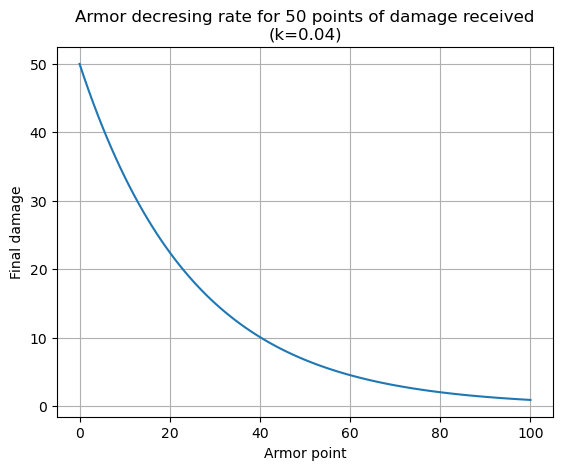

In [68]:
plt.plot(x, y)
plt.xlabel("Armor point")
plt.ylabel("Final damage")
plt.title(f"Armor decresing rate for 50 points of damage received\n(k={k})")
plt.grid(True)
plt.show()